In [19]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
library(GGally)
player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

colnames(player_stats) <- c(X1 = "index",
                       Age = "age",
                       Country = "country",
                       Plays = "plays",
                       Wikipedia = "wiki",
                       "Current Rank" = "current_rank",
                       "Best Rank" = "best_rank",
                       Name = "name",
                       Backhand = "backhand",
                       "Prize Money" = "prize_money", 
                       Height = "height",
                       "Favorite Surface" = "fav_surface",
                       "Turned Pro" = "turned_pro",
                       Seasons = "seasons",
                       Active = "active",
                       "Current Elo Rank" = "elo_rank",
                       "Best Elo Rank" = "best_elo_rank",
                       "Peak Elo Rank" = "peak_elo",
                       "Last Appearance" = "last_app",
                       Titles = "titles",
                       "GOAT Rank" = "goat_rank",
                       "Best Season" = "best_season",
                       Retired = "retired",
                       Masters = "masters",
                       Birthplace = "birthplace",
                       Residence = "res",
                       Weight = "weight",
                       Coach = "coach",
                       Facebook = "facebook",
                       Twitter = "twitter",
                       Nicknames = "nicknames",
                       "Grand Slams" = "grand_slams",
                       "Davis Cups" = "davis_cups",
                       "Web Site" = "website",
                         "Team Cups" = "team_cups",
                       Olympics = "olympics",
                       "Weeks at No. 1" = "weeks_at_top",
                       "Tour Finals" = "tour_finals")

tidy_player_stats <- player_stats %>%
    filter(active == "Yes") %>%
    filter(!is.na(goat_rank)) %>%
    filter(!is.na(titles)) %>%
    select(current_rank, best_rank, turned_pro, seasons, elo_rank, best_elo_rank, peak_elo, goat_rank, titles) %>%
    extract(col = current_rank, "current_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_rank, "best_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = elo_rank, "elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = best_elo_rank, "best_elo_rank" , remove = TRUE, convert = TRUE) %>%
    extract(col = peak_elo, "peak_elo" , remove = TRUE, convert = TRUE) %>%
    extract(col = goat_rank, "goat_rank" , remove = TRUE, convert = TRUE) %>%
    arrange(goat_rank)

head(tidy_player_stats)

tidy_player_stats <- as_tibble(tidy_player_stats)

set.seed(9999)
tidy_player_stats_split <- initial_split(tidy_player_stats, prop = 0.75, strata = goat_rank)
tidy_player_stats_training <- training(tidy_player_stats_split)
tidy_player_stats_testing <- testing(tidy_player_stats_split)

# tidy_player_stats_training <- tidy_player_stats_training %>%
#     mutate(goat_rank = as_factor(goat_rank))

# tidy_player_stats_testing <- tidy_player_stats_testing %>%
#     mutate(goat_rank = as_factor(goat_rank))



Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
2,1,2003,17,2,1,2629,2,77
1,1,2001,19,1,1,2552,3,84
128,1,2005,15,7,2,2500,12,46
121,3,2005,14,4,3,2329,33,22
15,3,2002,18,12,5,2291,36,16


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


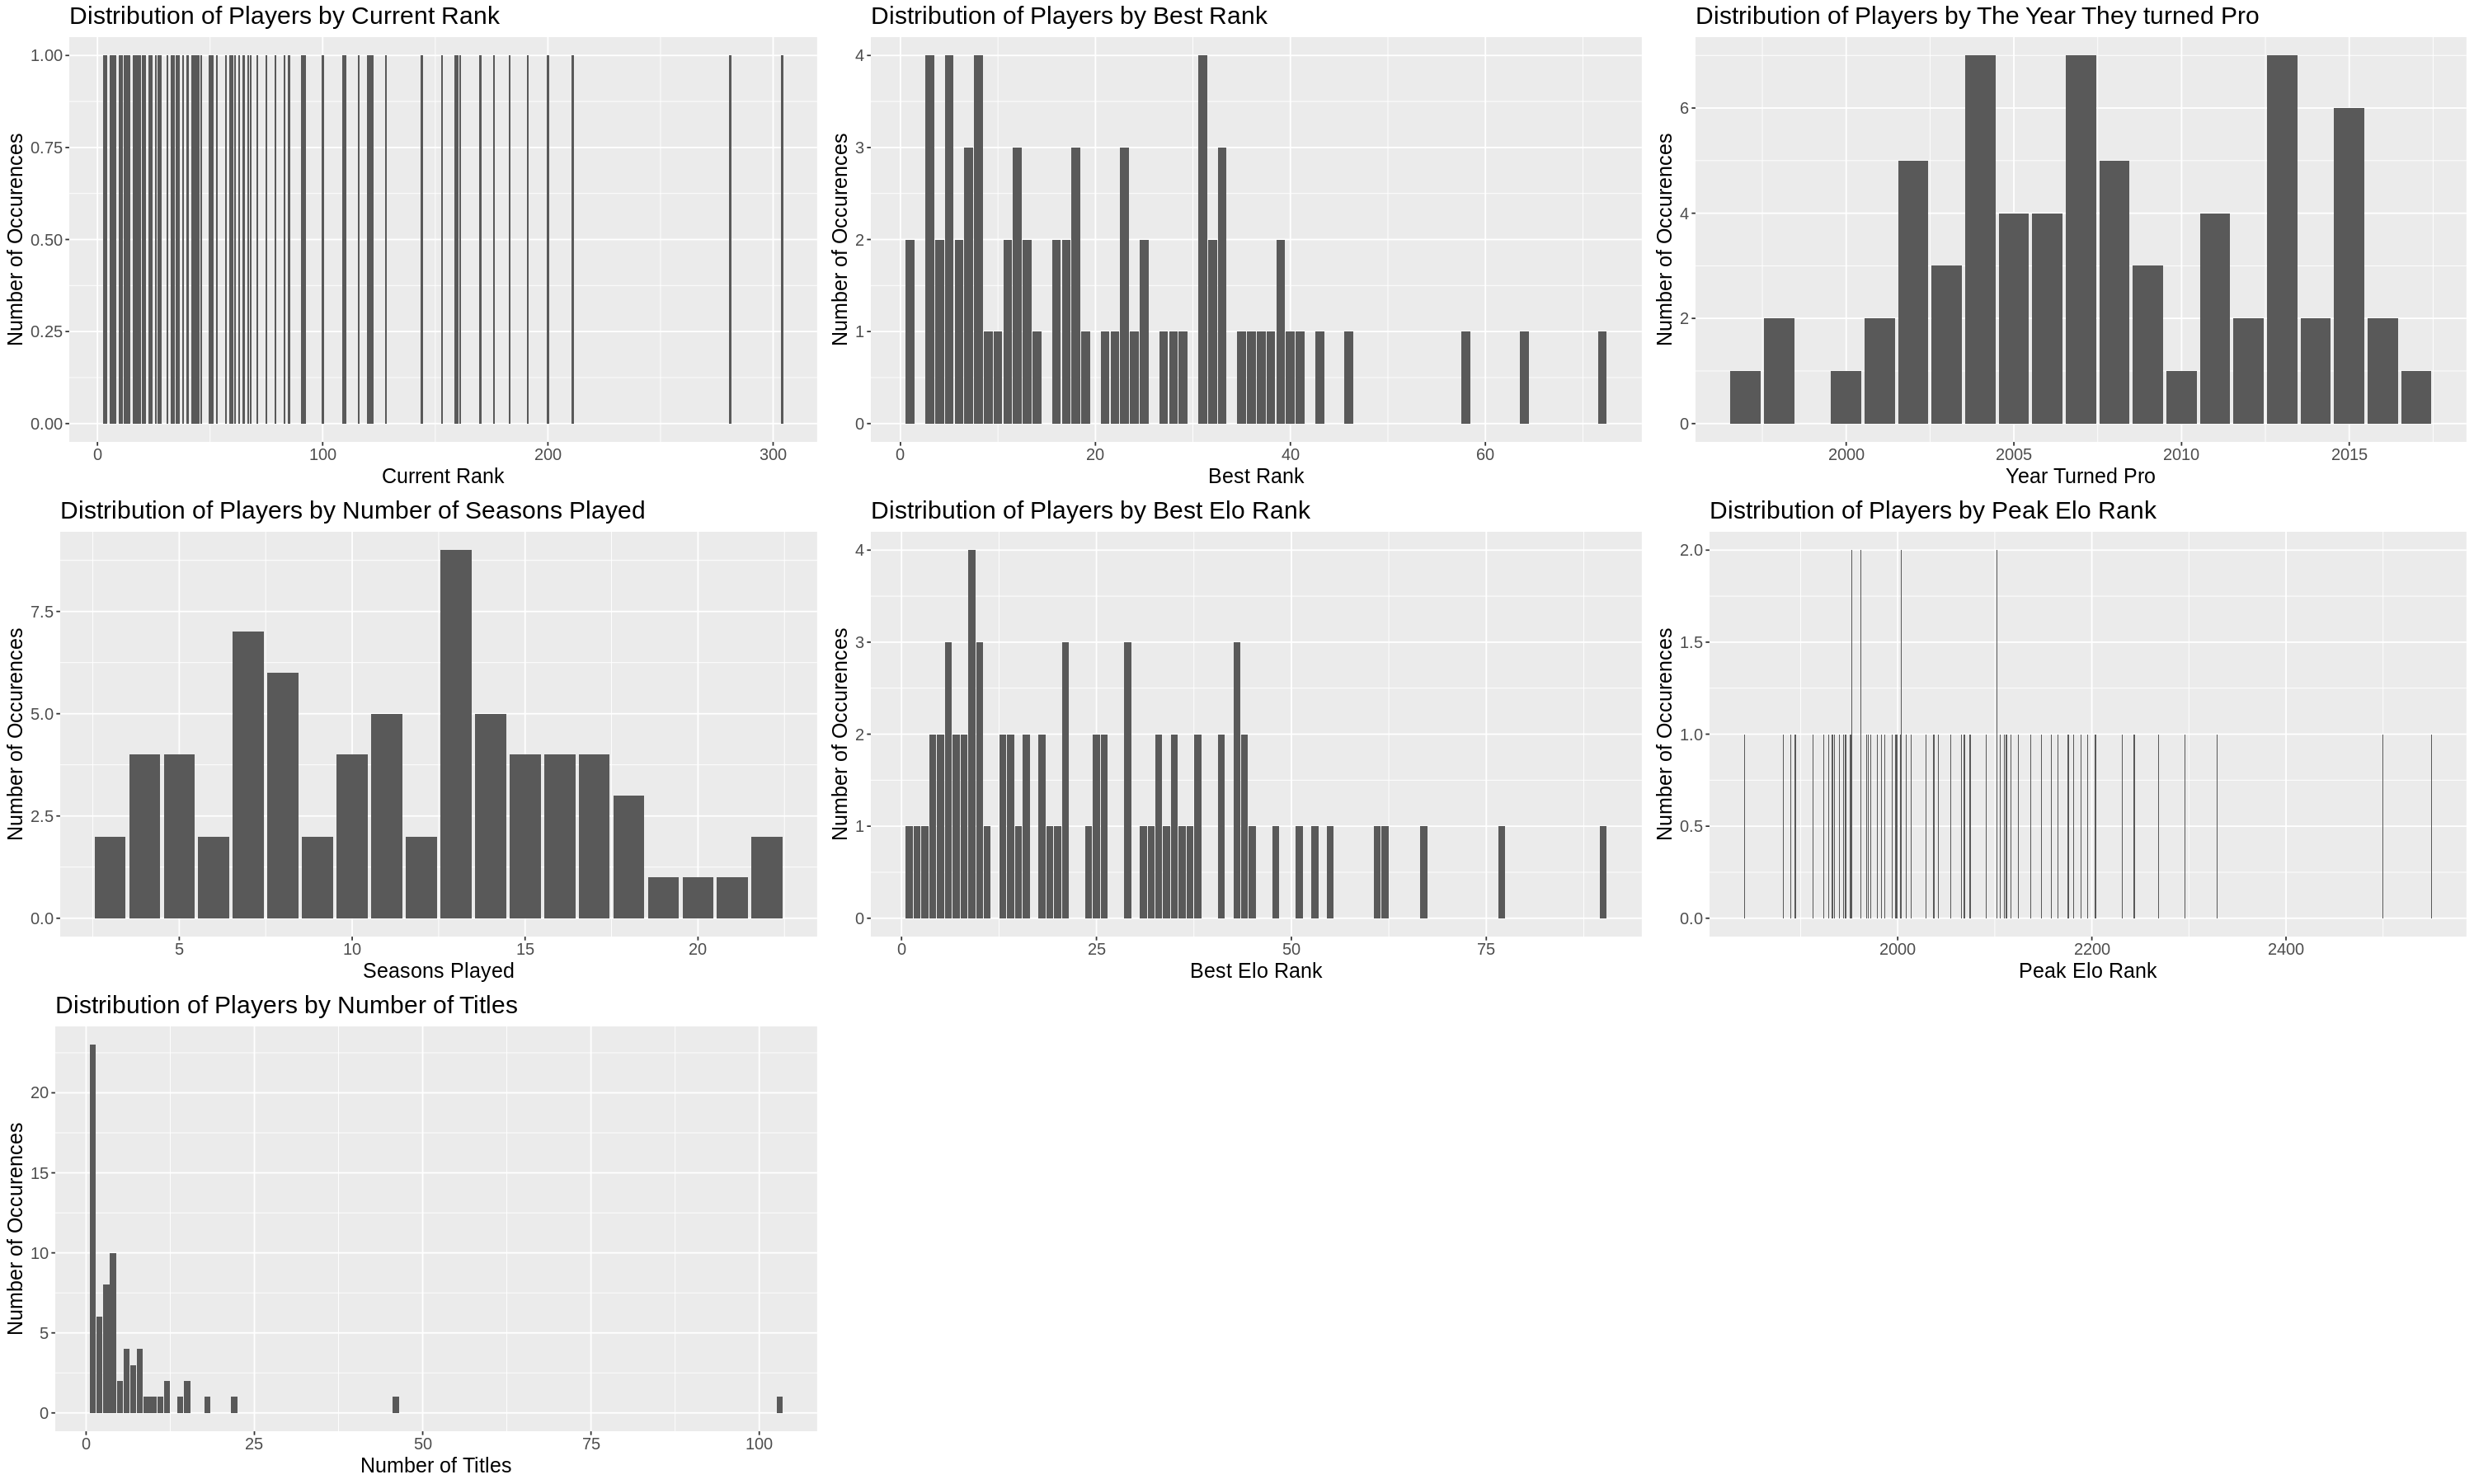

In [20]:
current_rank_distribution <- tidy_player_stats_training %>%
    group_by(current_rank) %>%
    summarize(n=n())
best_rank_distribution <- tidy_player_stats_training %>%
    group_by(best_rank) %>%
    summarize(n=n())
turned_pro_distribution <- tidy_player_stats_training %>%
    group_by(turned_pro) %>%
    summarize(n=n())
seasons_distribution <- tidy_player_stats_training %>%
    group_by(seasons) %>%
    summarize(n=n())
best_elo_rank_distribution <- tidy_player_stats_training %>%
    group_by(best_elo_rank) %>%
    summarize(n=n())
peak_elo_distribution <- tidy_player_stats_training %>%
    group_by(peak_elo) %>%
    summarize(n=n())
titles_distribution <- tidy_player_stats_training %>%
    group_by(titles) %>%
    summarize(n=n())

options(repr.plot.width = 8, repr.plot.height = 8)
#predictor variables
current_rank_plot <- current_rank_distribution %>%
    ggplot(aes(x = current_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Current Rank", x = "Current Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#current_rank_plot
best_rank_plot <- best_rank_distribution %>%
    ggplot(aes(x = best_rank, y = n)) +
geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Best Rank", x = "Best Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_rank_plot
turned_pro_plot <- turned_pro_distribution %>%
    ggplot(aes(x = turned_pro, y = n)) +
    geom_bar(stat = "identity") +
    labs(title = "Distribution of Players by The Year They turned Pro", x = "Year Turned Pro", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#turned_pro_plot
seasons_plot <- seasons_distribution %>%
    ggplot(aes(x = seasons, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Number of Seasons Played", x = "Seasons Played", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#seasons_plot
best_elo_rank_plot <- best_elo_rank_distribution %>%
    ggplot(aes(x = best_elo_rank, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Best Elo Rank", x = "Best Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#best_elo_rank_plot
peak_elo_plot <- peak_elo_distribution %>%
    ggplot(aes(x = peak_elo, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Peak Elo Rank", x = "Peak Elo Rank", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#peak_elo_plot
titles_plot <- titles_distribution %>%
    ggplot(aes(x = titles, y = n)) +
    geom_histogram(stat = "identity") +
    labs(title = "Distribution of Players by Number of Titles", x = "Number of Titles", y = "Number of Occurences") + 
    theme(text = element_text(size=15))
#titles_plot

options(repr.plot.width = 25, repr.plot.height = 15)
grid.arrange(current_rank_plot, best_rank_plot, turned_pro_plot, seasons_plot, best_elo_rank_plot, peak_elo_plot, titles_plot)


In [21]:
head(current_rank_distribution)
head(tidy_player_stats_training)
head(tidy_player_stats_testing)

current_rank,n
<int>,<int>
3,1
4,1
6,1
7,1
8,1
10,1


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
3,1,1998,22,3,1,2550,1,103
128,1,2005,15,7,2,2500,12,46
121,3,2005,14,4,3,2329,33,22
18,4,2007,13,10,4,2296,49,12
33,5,2004,16,20,6,2244,49,18
7,3,2013,8,13,5,2231,65,11


current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
2,1,2003,17,2,1,2629,2,77
1,1,2001,19,1,1,2552,3,84
15,3,2002,18,12,5,2291,36,16
39,3,2005,16,23,6,2232,53,18
5,4,2011,10,6,5,2211,58,16
124,14,2000,20,114,16,2062,133,8


In [34]:
summ <- tidy_player_stats_training %>%
    slice(1,36,72) 

summ 

current_rank,best_rank,turned_pro,seasons,elo_rank,best_elo_rank,peak_elo,goat_rank,titles
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
121,3,2005,14,4,3,2329,33,22
42,17,2007,11,45,25,2014,293,2


In [33]:
mean<- tidy_player_stats_training %>%
    filter(goat_rank==1) %>% 
    summarize(average_peak_elo = mean(peak_elo))
mean

mean2<- tidy_player_stats_training %>%
    filter(goat_rank==489) %>% 
    summarize(average_peak_elo= mean(peak_elo))
mean2

mean3<- tidy_player_stats_training %>%
    summarize(average_peak_elo= mean(peak_elo))
mean3

average_peak_elo
<dbl>
NaN


average_peak_elo
<dbl>
1933.067


average_peak_elo
<dbl>
2047.486


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


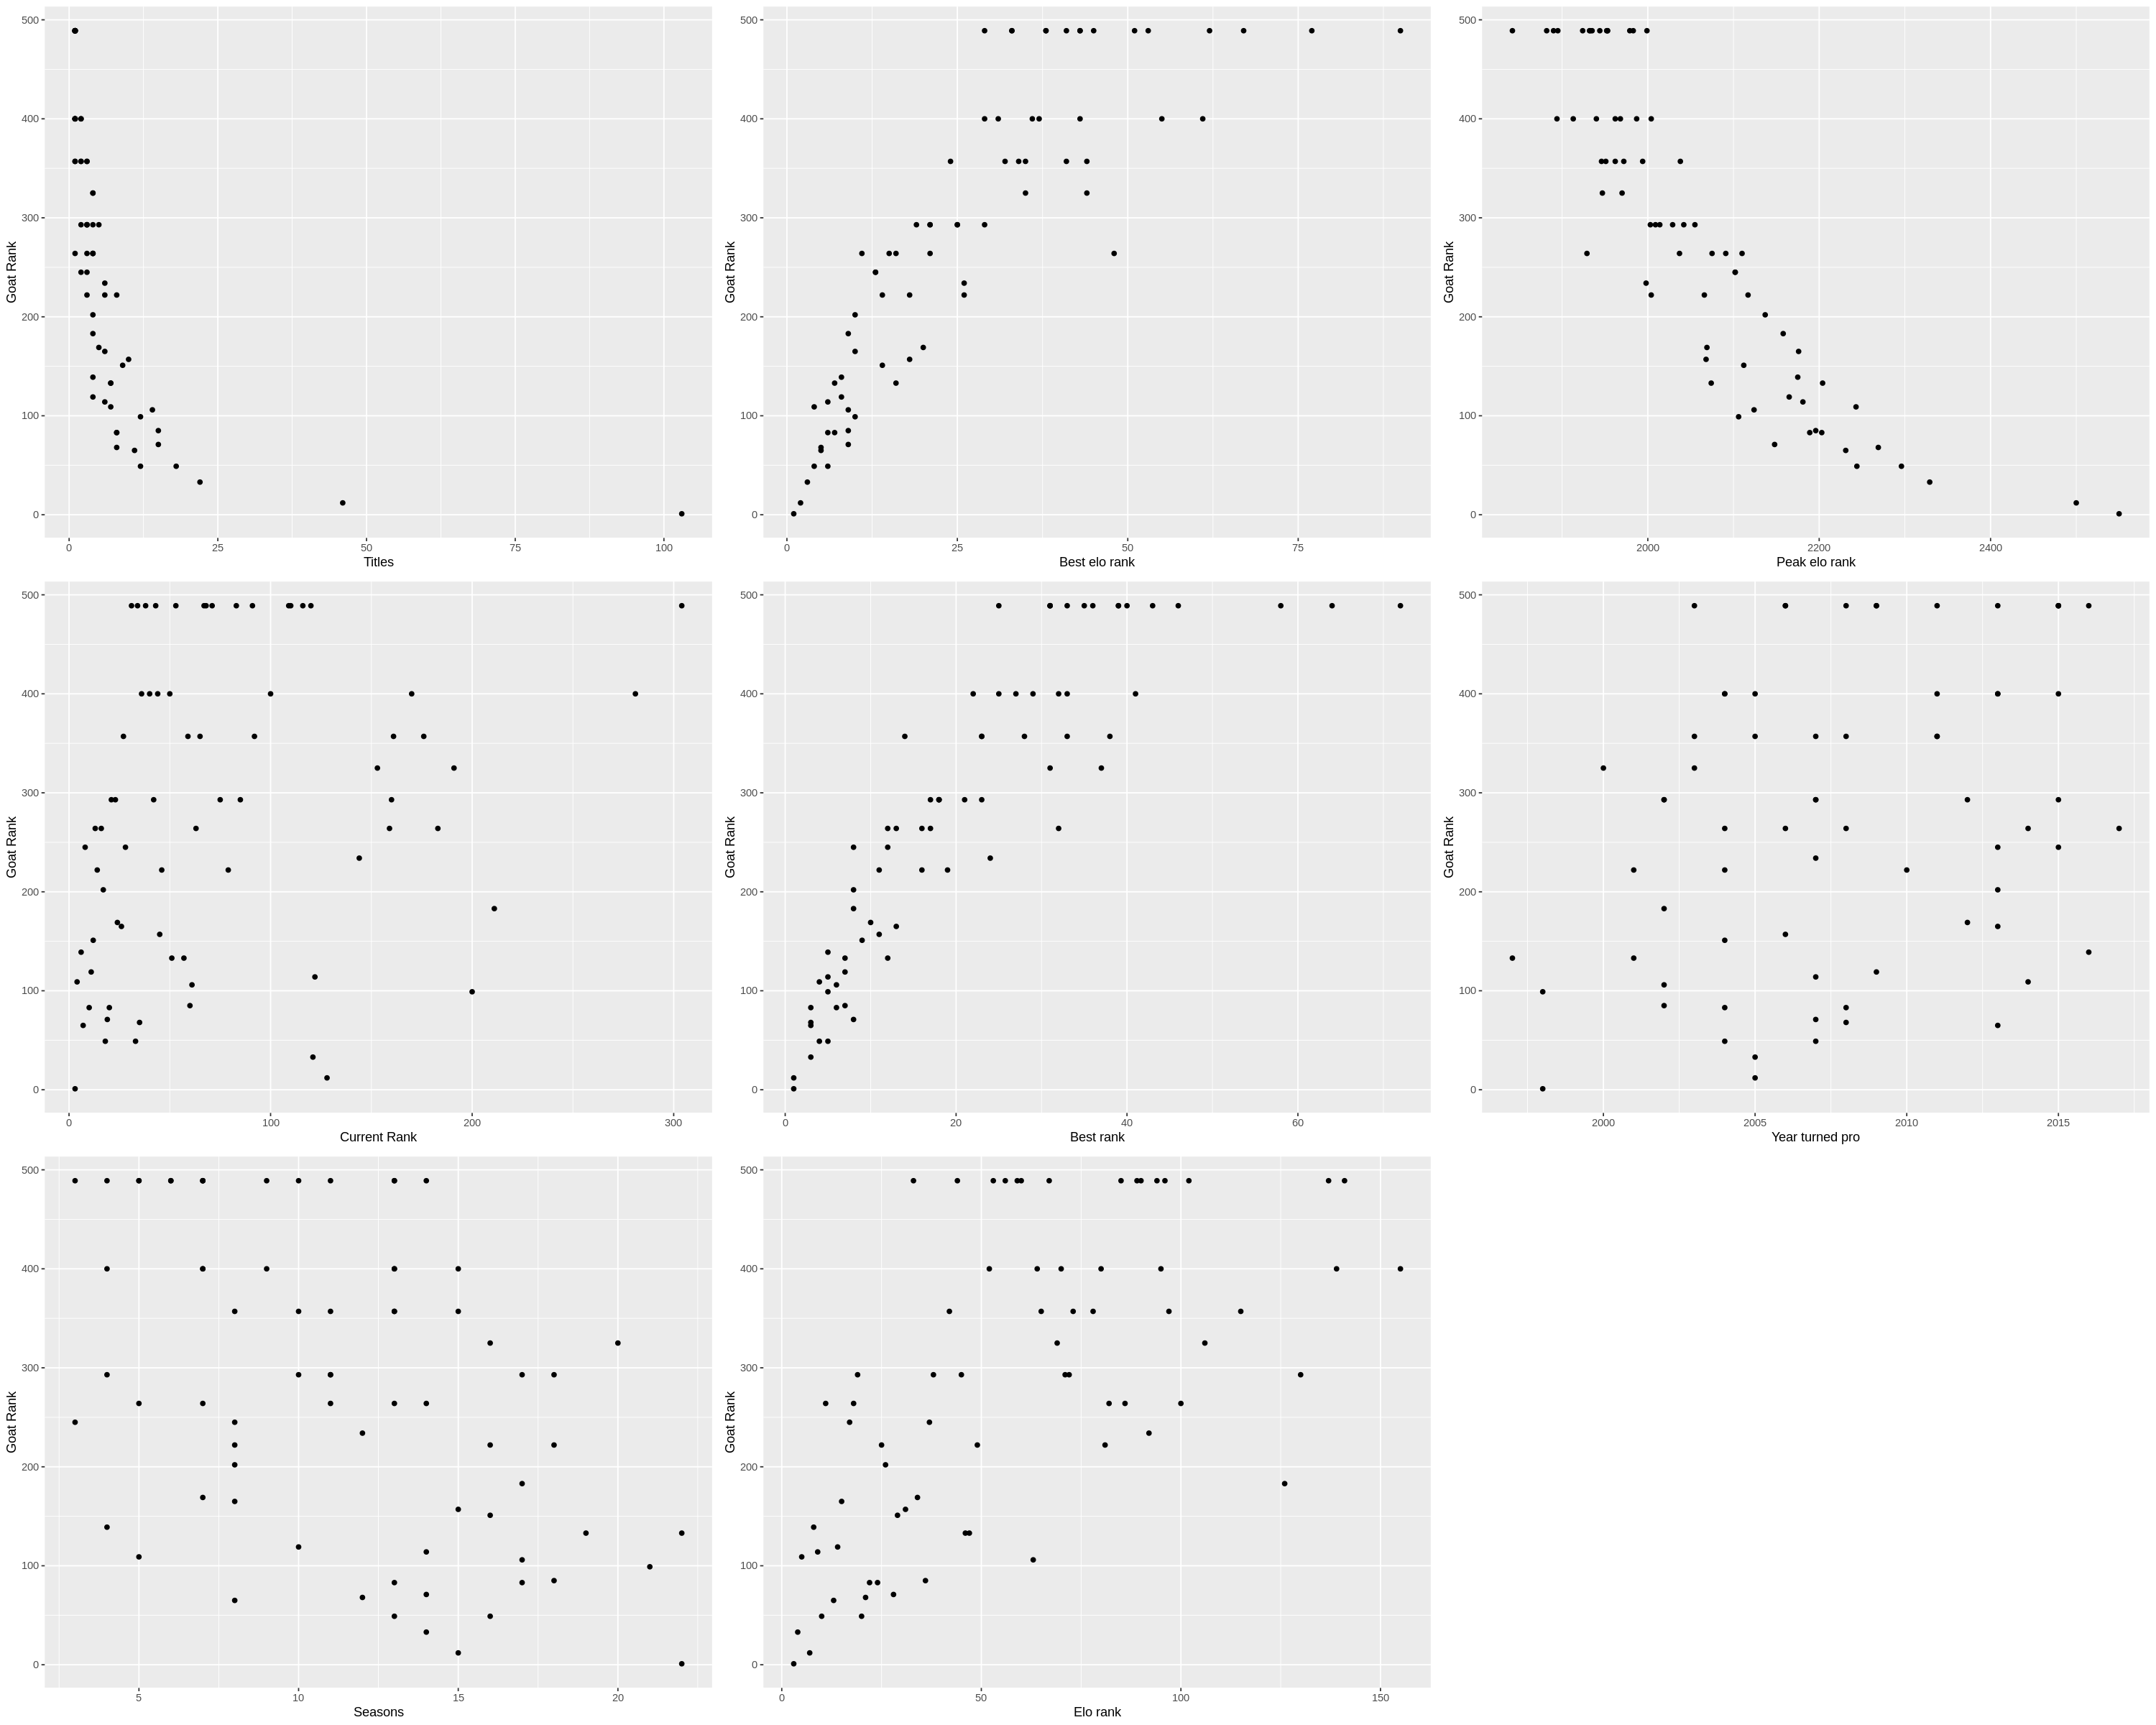

In [22]:
#EDAS                                     
eda1<- tidy_player_stats_training%>%
    ggplot(aes(x=titles, y=goat_rank)) + geom_point()+
    labs(x="Titles", y= "Goat Rank")

eda2<- tidy_player_stats_training%>%
    ggplot(aes(x=best_elo_rank, y=goat_rank)) + geom_point() +
    labs(x="Best elo rank", y= "Goat Rank")

eda3<- tidy_player_stats_training %>%
    ggplot(aes(x=peak_elo, y=goat_rank)) + geom_point() +
    labs(x="Peak elo rank", y= "Goat Rank")

eda4<- tidy_player_stats_training %>%
    ggplot(aes(x=current_rank, y=goat_rank)) + geom_point() +
    labs(x="Current Rank", y= "Goat Rank")

eda5<- tidy_player_stats_training %>%
    ggplot(aes(x=best_rank, y=goat_rank)) + geom_point()  +
    labs(x="Best rank", y= "Goat Rank")

eda6<-tidy_player_stats_training %>%
    ggplot(aes(x=turned_pro, y=goat_rank)) + geom_point()  +
    labs(x="Year turned pro", y= "Goat Rank")

eda7<-  tidy_player_stats_training %>%
    ggplot(aes(x=seasons, y=goat_rank)) + geom_point()  +
    labs(x="Seasons", y= "Goat Rank")


eda8<- tidy_player_stats_training %>%
    ggplot(aes(x=elo_rank, y=goat_rank)) + geom_point() +
    labs(x="Elo rank", y= "Goat Rank")

options(repr.plot.width = 25, repr.plot.height = 20)
grid.arrange(eda1, eda2, eda3, eda4, eda5, eda6, eda7,eda8)


Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing non-finite values (stat_density).”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing

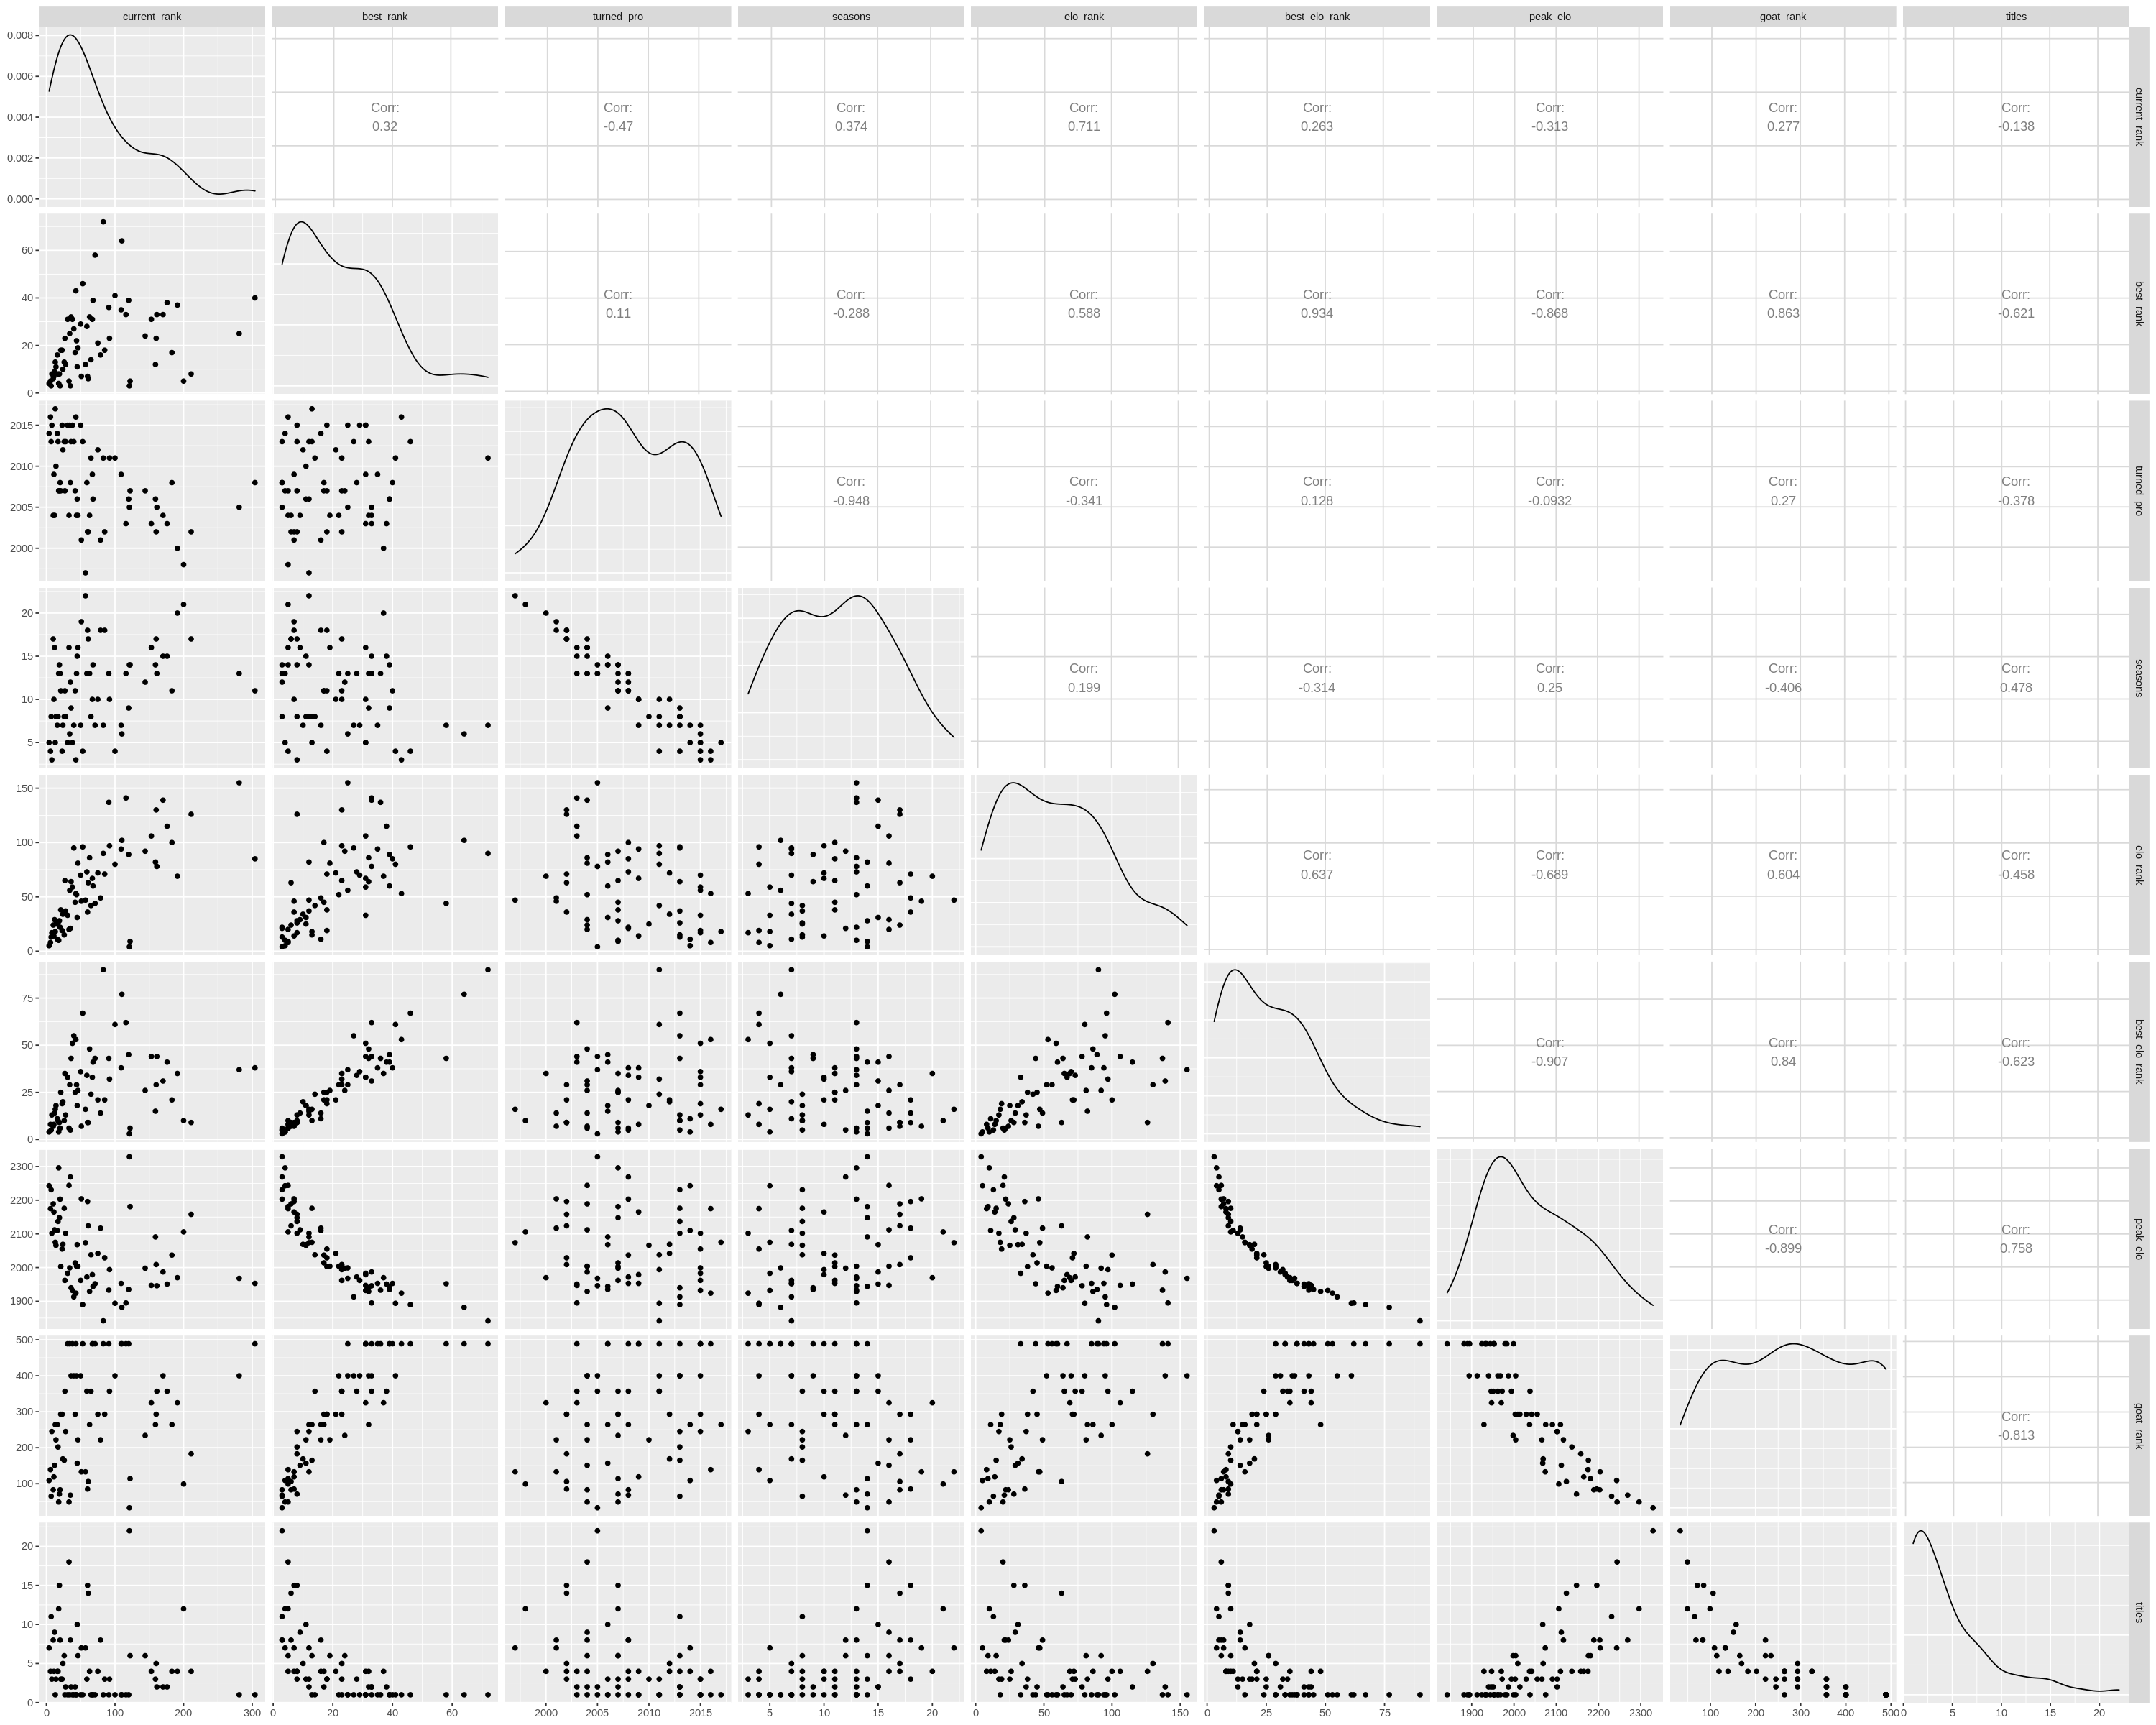

In [25]:
tidy_player_stats_training <- tidy_player_stats_training %>%
    filter(titles < 30)

ggpairs(tidy_player_stats_training)

In [24]:

#MODEL

tidy_player_stats_training <- tidy_player_stats_training %>%
    filter(titles < 30)

#KNN Regression
set.seed(1234)
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("regression") 

tennis_recipe <- recipe(goat_rank ~ titles, data = tidy_player_stats_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
 
tennis_recipe

tennis_vfold <- vfold_cv(tidy_player_stats_training, v=5, strata = goat_rank)

tennis_workflow <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50))

tennis_results <- tennis_workflow %>%
    tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
    collect_metrics()

set.seed(1234)
#minimum RMSPE
tennis_min <- tennis_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

tennis_min


k_min <- tennis_min %>%
         pull(neighbors)

tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

tennis_best_fit <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_best_spec) %>%
    fit(data=tidy_player_stats_training)

tennis_summary <- tennis_best_fit %>%
    predict(tidy_player_stats_testing) %>%
    bind_cols(tidy_player_stats_testing) %>%
    metrics(truth = goat_rank, estimate = .pred)

tennis_summary


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
14,rmse,standard,60.09204,5,5.678077,Model14


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,55.3100260
rsq,standard,0.9121174
mae,standard,49.2891156


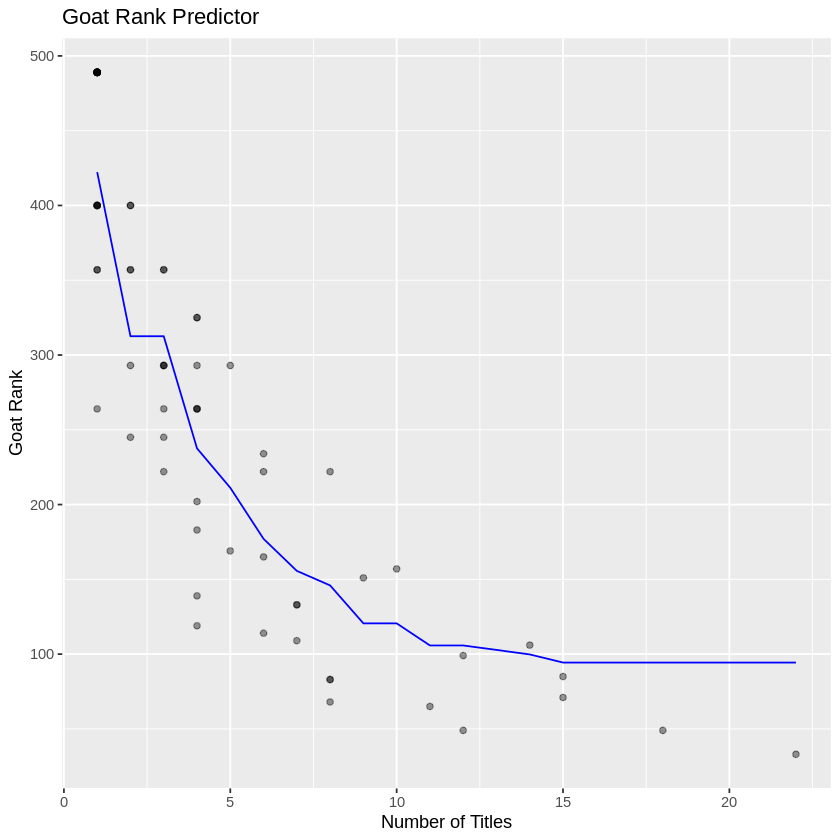

In [26]:
#PREDCTING GOATRANK WITH TITLES

options(repr.plot.width = 7, repr.plot.height = 7)
tennis_preds <- tennis_best_fit %>%
  predict(tidy_player_stats_training) %>%
  bind_cols(tidy_player_stats_training)

tennis_plot <- ggplot(tidy_player_stats_training, aes(x = titles, y = goat_rank)) +
    geom_point(alpha = 0.4) +
    geom_line(data=tennis_preds, 
              mapping = aes(x=titles, y=.pred),
              color = "blue") +
    labs(title = "Goat Rank Predictor", x="Number of Titles", y="Goat Rank") 

tennis_plot


In [27]:
#FINAL MODEL

tidy_player_stats_training <- tidy_player_stats_training %>%
    filter(titles < 30)

#KNN Regression
set.seed(1234)
tennis_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%
    set_mode("regression") 

tennis_recipe <- recipe(goat_rank ~ titles + best_elo_rank + peak_elo + best_rank, data = tidy_player_stats_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
 
tennis_recipe

tennis_vfold <- vfold_cv(tidy_player_stats_training, v=5, strata = goat_rank)

tennis_workflow <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 50))

tennis_results <- tennis_workflow %>%
    tune_grid(resamples = tennis_vfold, grid = gridvals) %>%
    collect_metrics()

#minimum RMSPE
tennis_min <- tennis_results %>%
   filter(.metric == "rmse") %>%
   arrange(mean) %>% 
   slice(1)

tennis_min

k_min <- tennis_min %>%
         pull(neighbors)

tennis_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

tennis_best_fit <- workflow() %>%
    add_recipe(tennis_recipe) %>%
    add_model(tennis_best_spec) %>%
    fit(data=tidy_player_stats_training)

tennis_summary <- tennis_best_fit %>%
    predict(tidy_player_stats_testing) %>%
    bind_cols(tidy_player_stats_testing) %>%
    metrics(truth = goat_rank, estimate = .pred)

tennis_summary


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          4

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
4,rmse,standard,39.55535,5,1.261523,Model04


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,38.6101162
rsq,standard,0.9569848
mae,standard,31.9166667
